In [32]:
import os
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

In [33]:
# torch.manual_seed(1)    # reproducible

# Hyper Parameters
EPOCH = 1               # train the training data n times, to save time, we just train 1 epoch
BATCH_SIZE = 50
LR = 0.001              # learning rate


In [34]:
from ipywidgets import IntProgress

#DOWNLOAD_MNIST = False

if not(os.path.exists('./mnist/')) or not os.listdir('./mnist/'):
    # not mnist dir or mnist is empyt dir
    DOWNLOAD_MNIST = True
    
#DOWNLOAD_MNIST = True
train_data = torchvision.datasets.MNIST(
    root='./',
    train=True,                                     # this is training data
    transform=torchvision.transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                                   # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=True
)

# img = transforms.ToTensor()(np.array(img))


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


In [36]:
train_data.data.size(), train_data.train_labels.size()

(torch.Size([60000, 28, 28]), torch.Size([60000]))

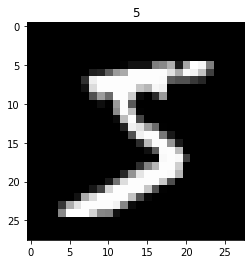

In [37]:
plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()

In [38]:
# Data Loader for easy mini-batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

In [40]:
# pick 2000 samples to speed up testing
test_data = torchvision.datasets.MNIST(root='./', train=False)
test_x = torch.unsqueeze(test_data.test_data, dim=1).type(torch.FloatTensor)[:2000]/255.   # shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_y = test_data.test_labels[:2000]

In [41]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1,              # input height
                out_channels=16,            # n_filters
                kernel_size=5,              # filter size
                stride=1,                   # filter movement/step
                padding=2,                  # if want same width and length of this image after Conv2d, padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (16, 28, 28)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(kernel_size=2),    # choose max value in 2x2 area, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(         # input shape (16, 14, 14)
            nn.Conv2d(16, 32, 5, 1, 2),     # output shape (32, 14, 14)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(2),                # output shape (32, 7, 7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)   # fully connected layer, output 10 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)           # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output, x    # return x for visualization

In [42]:
cnn = CNN()
cnn

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)

In [43]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

In [44]:
# following function (plot_with_labels) is for visualization, can be ignored if not interested
from matplotlib import cm
try: 
    from sklearn.manifold import TSNE
    HAS_SK = True
except: 
    HAS_SK = False
    print('Please install sklearn for layer visualization')
def plot_with_labels(lowDWeights, labels):
    plt.cla()
    X, Y = lowDWeights[:, 0], lowDWeights[:, 1]
    for x, y, s in zip(X, Y, labels):
        c = cm.rainbow(int(255 * s / 9)); 
        plt.text(x, y, s, backgroundcolor=c, fontsize=9)
    plt.xlim(X.min(), X.max())
    plt.ylim(Y.min(), Y.max())
    plt.title('Visualize last layer')
    plt.show()
    plt.pause(0.01)

Epoch:  0 | train loss: 2.3086 | test accuracy: 0.12


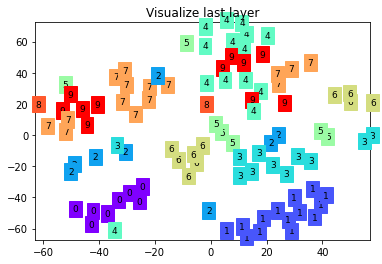

Epoch:  0 | train loss: 0.5143 | test accuracy: 0.81


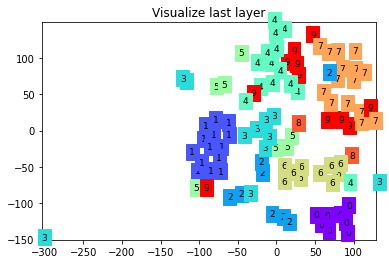

Epoch:  0 | train loss: 0.2728 | test accuracy: 0.87


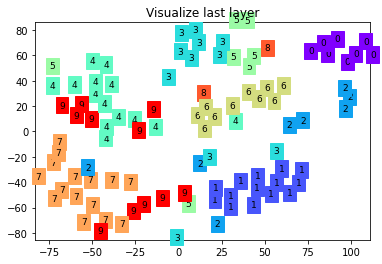

Epoch:  0 | train loss: 0.3118 | test accuracy: 0.89


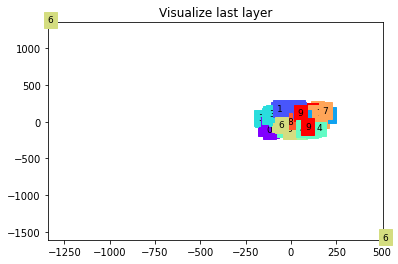

Epoch:  0 | train loss: 0.1466 | test accuracy: 0.93


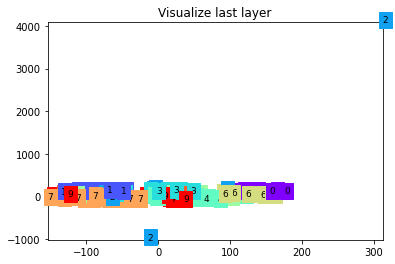

Epoch:  0 | train loss: 0.0581 | test accuracy: 0.94


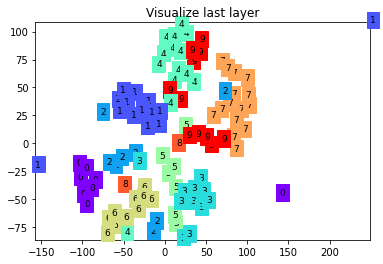

Epoch:  0 | train loss: 0.0591 | test accuracy: 0.95


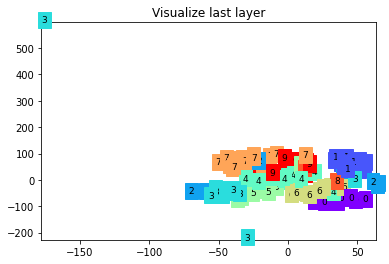

Epoch:  0 | train loss: 0.0185 | test accuracy: 0.95


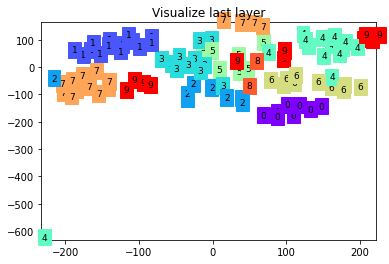

Epoch:  0 | train loss: 0.1268 | test accuracy: 0.96


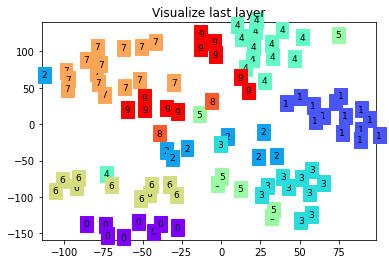

Epoch:  0 | train loss: 0.0413 | test accuracy: 0.94


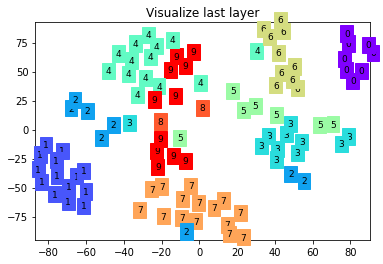

Epoch:  0 | train loss: 0.1082 | test accuracy: 0.96


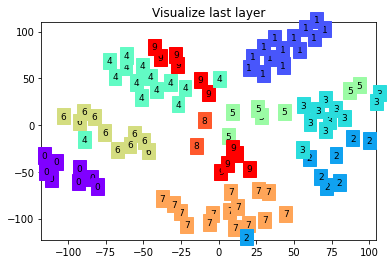

Epoch:  0 | train loss: 0.0987 | test accuracy: 0.97


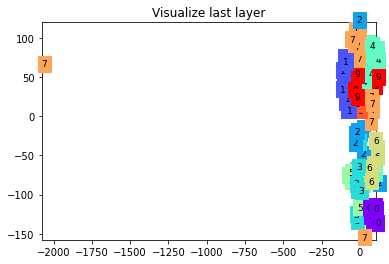

Epoch:  0 | train loss: 0.0648 | test accuracy: 0.97


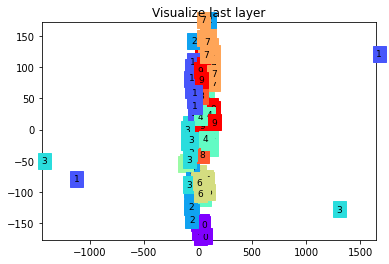

Epoch:  0 | train loss: 0.0650 | test accuracy: 0.97


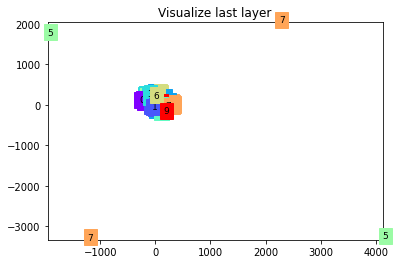

Epoch:  0 | train loss: 0.1557 | test accuracy: 0.97


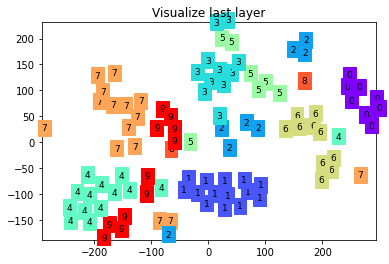

Epoch:  0 | train loss: 0.0288 | test accuracy: 0.97


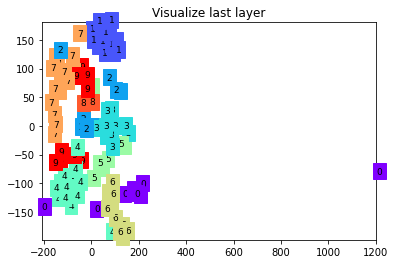

Epoch:  0 | train loss: 0.2044 | test accuracy: 0.97


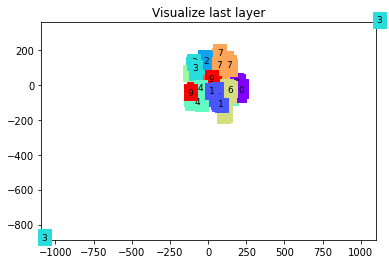

Epoch:  0 | train loss: 0.1012 | test accuracy: 0.96


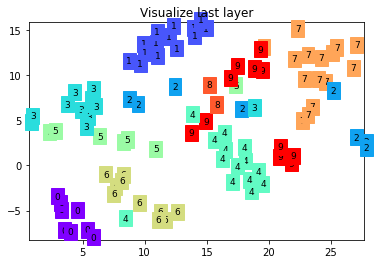

Epoch:  0 | train loss: 0.0346 | test accuracy: 0.97


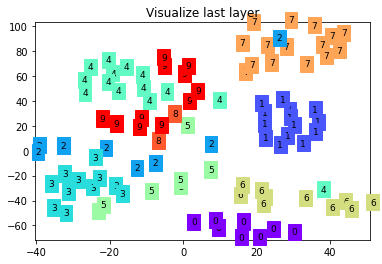

Epoch:  0 | train loss: 0.0823 | test accuracy: 0.98


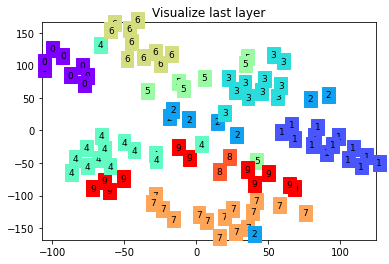

Epoch:  0 | train loss: 0.0298 | test accuracy: 0.98


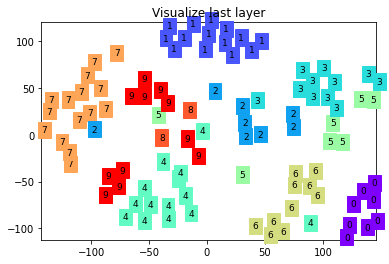

Epoch:  0 | train loss: 0.0294 | test accuracy: 0.98


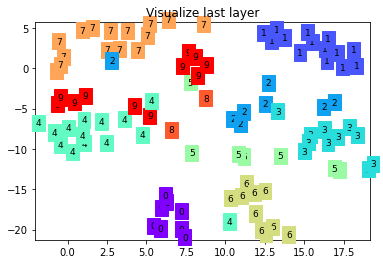

In [ ]:
plt.ion()
# training and testing
for epoch in range(EPOCH):
    for step, (b_x, b_y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader

        output = cnn(b_x)[0]               # cnn output
        loss = loss_func(output, b_y)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients

        if step % 50 == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.numpy()
            accuracy = float((pred_y == test_y.data.numpy()).astype(int).sum()) / float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)
            if HAS_SK:
                # Visualization of trained flatten layer (T-SNE)
                tsne = TSNE(perplexity=16, n_components=2, init='pca', n_iter=5000)
                plot_only = 100
                low_dim_embs = tsne.fit_transform(last_layer.data.numpy()[:plot_only, :])
                labels = test_y.numpy()[:plot_only]
                plot_with_labels(low_dim_embs, labels)
plt.ioff()